In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## drop day, month, year 
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
## encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [11]:
## Independent and Dependent Features
x = df.drop(['FWI'],axis=1)
y = df['FWI']

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=108)

In [13]:
## Feature Selection Based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649050,-0.230764,-0.326776,0.695049,0.477100,0.373318,0.629782,0.451010,0.569229,0.258635
RH,-0.649050,1.000000,0.243862,0.228012,-0.651100,-0.380879,-0.207034,-0.689208,-0.325398,-0.463761,-0.425382
Ws,-0.230764,0.243862,1.000000,0.124608,-0.141568,0.032145,0.097593,0.045153,0.062787,-0.061138,-0.113069
Rain,-0.326776,0.228012,0.124608,1.000000,-0.549099,-0.275915,-0.285939,-0.342575,-0.285886,-0.371569,-0.073403
FFMC,0.695049,-0.651100,-0.141568,-0.549099,1.000000,0.582940,0.481954,0.730902,0.568177,0.770938,0.229225
DMC,0.477100,-0.380879,0.032145,-0.275915,0.582940,1.000000,0.876633,0.659458,0.981552,0.565712,0.181525
DC,0.373318,-0.207034,0.097593,-0.285939,0.481954,0.876633,1.000000,0.482799,0.942641,0.481476,-0.080230
ISI,0.629782,-0.689208,0.045153,-0.342575,0.730902,0.659458,0.482799,1.000000,0.620466,0.722164,0.278346
BUI,0.451010,-0.325398,0.062787,-0.285886,0.568177,0.981552,0.942641,0.620466,1.000000,0.563559,0.078428
Classes,0.569229,-0.463761,-0.061138,-0.371569,0.770938,0.565712,0.481476,0.722164,0.563559,1.000000,0.181768


<Axes: >

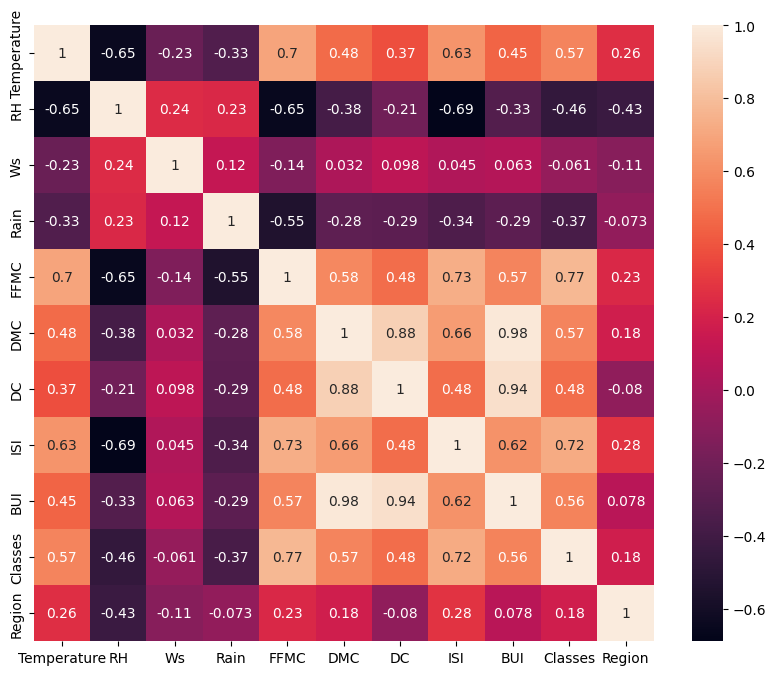

In [14]:
## Check for multicolinearity
plt.figure(figsize=(10,8))
corr=x_train.corr()
sns.heatmap(corr,annot=True)

In [15]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
## threshold--Domain expertise
corr_features=correlation(x_train,0.85)

In [17]:
## drop features when correlation is more than 0.85
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

## Feature Scaling or Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Box plots to understand Effect of Standard Scaler

Text(0.5, 1.0, 'x_train After Scaling')

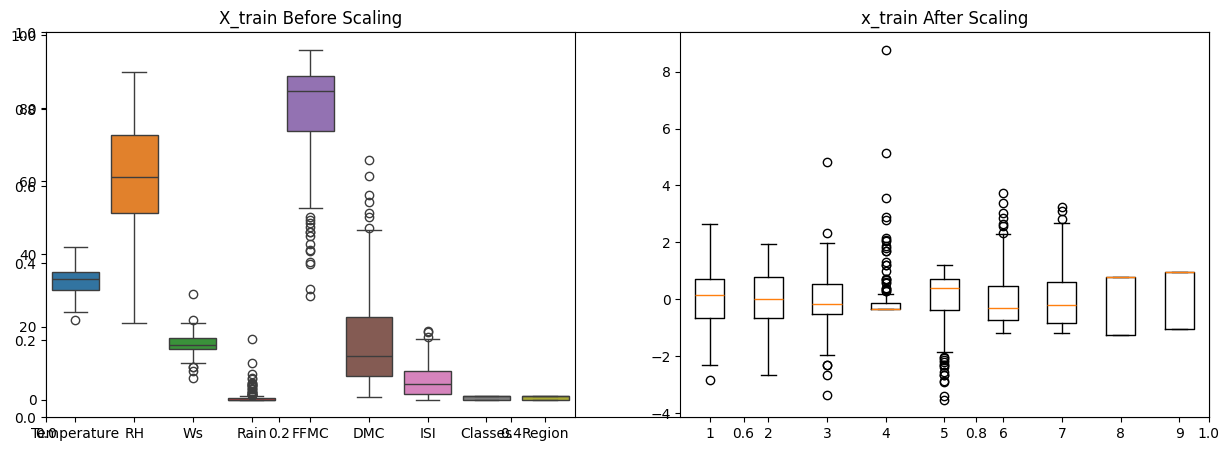

In [19]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
plt.boxplot(x_train_scaled)
plt.title("x_train After Scaling")

## Linear Regression Model

Mean Absolute Error:  0.5418906705857266
R2 score:  0.9825364374923976


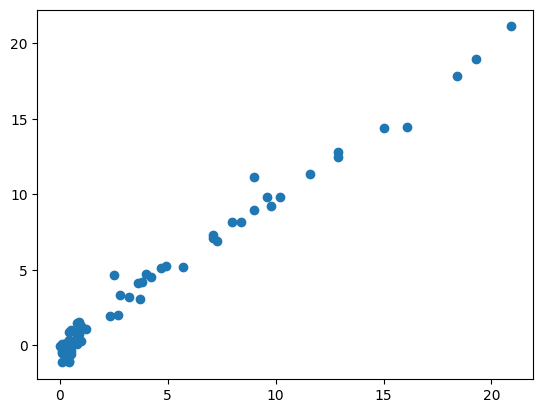

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

## Lasso Regression

Mean Absolute Error:  0.9219933179346289
R2 score:  0.9540957788709424


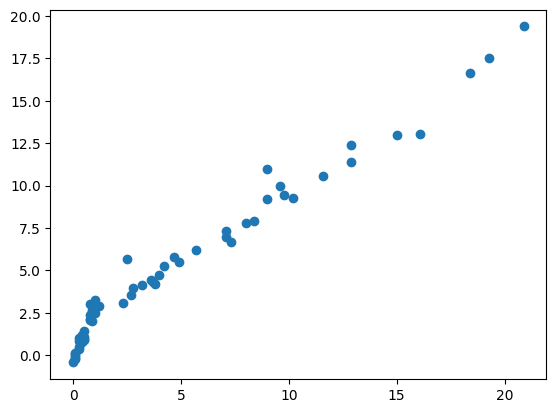

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso= Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

## Cross Validation

In [31]:
from sklearn.linear_model import LassoCV
cv = LassoCV(cv=5)
cv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [32]:
cv.predict(x_test_scaled)

array([ 5.5532209 ,  3.27627655, -0.09900091,  1.68545205,  0.86634039,
       12.8931535 ,  3.37737797, -0.6531525 ,  9.77296649,  3.35246386,
        1.05481421,  0.71601452, -0.26269947,  5.27981743, -0.28859121,
       -0.51064747, -0.58250771, -0.53670494,  0.11595314, -0.60363612,
        9.8450914 , 11.26993126,  8.17778335, -0.21416815,  1.63604146,
        1.53812107, -0.28491667,  1.25053826, -1.19592155,  4.82780699,
        7.46466944, 17.79456793, -0.04472509,  0.99628917,  5.01902969,
        0.65466477,  3.97229948,  2.16864086, 18.84077403,  0.29950817,
        8.11904746,  9.2926868 ,  4.1022762 ,  4.62356278,  2.42272402,
        0.76805168,  0.11852407, 11.28933919,  6.7980908 ,  1.79115379,
        9.06272676, 12.28776186, -0.58173509, -0.24653637, 21.08085945,
        7.19565791,  4.54771571, -0.37538387, 14.30257791, -0.48015633,
       14.21263095])

In [33]:
cv.alpha_

0.04364552341328106

In [34]:
cv.alphas_

array([7.11313282, 6.63373148, 6.18664018, 5.76968133, 5.38082412,
       5.01817459, 4.67996641, 4.36455234, 4.07039612, 3.79606505,
       3.54022297, 3.30162379, 3.07910539, 2.871584  , 2.67804885,
       2.49755732, 2.32923031, 2.17224799, 2.02584574, 1.88931052,
       1.76197731, 1.64322594, 1.53247801, 1.42919412, 1.33287122,
       1.24304016, 1.15926342, 1.08113294, 1.0082682 , 0.9403143 ,
       0.87694026, 0.81783742, 0.76271792, 0.71131328, 0.66337315,
       0.61866402, 0.57696813, 0.53808241, 0.50181746, 0.46799664,
       0.43645523, 0.40703961, 0.3796065 , 0.3540223 , 0.33016238,
       0.30791054, 0.2871584 , 0.26780488, 0.24975573, 0.23292303,
       0.2172248 , 0.20258457, 0.18893105, 0.17619773, 0.16432259,
       0.1532478 , 0.14291941, 0.13328712, 0.12430402, 0.11592634,
       0.10811329, 0.10082682, 0.09403143, 0.08769403, 0.08178374,
       0.07627179, 0.07113133, 0.06633731, 0.0618664 , 0.05769681,
       0.05380824, 0.05018175, 0.04679966, 0.04364552, 0.04070

In [35]:
cv.mse_path_

array([[83.65116757, 49.34468159, 52.60248765, 60.75612586, 53.91821181],
       [82.83091139, 44.64418538, 46.14566492, 55.05708047, 47.15370668],
       [75.0080524 , 40.48239617, 40.50724619, 47.87627825, 41.22589043],
       [68.12166353, 35.66922334, 35.59281194, 41.68838457, 36.06786234],
       [62.05532648, 31.46504982, 31.30872603, 36.36005341, 31.57947058],
       [56.70741196, 27.79140526, 27.57348582, 31.77588153, 27.67357617],
       [51.98917869, 24.58088629, 24.3163329 , 27.83548379, 24.27458091],
       [45.62483089, 21.77394183, 21.47550935, 24.45171611, 21.31652201],
       [39.93003984, 19.31898971, 18.99732148, 21.54942705, 18.74208745],
       [34.9697335 , 17.17110019, 16.8349702 , 19.06302911, 16.50134264],
       [30.64877915, 15.29113382, 14.94791071, 16.9358    , 14.55108953],
       [26.88364942, 13.64469944, 13.30065271, 15.11857765, 12.85350758],
       [23.60378049, 12.20270734, 11.86236549, 13.56855902, 11.37577714],
       [20.74565705, 10.93893131, 10.6

Mean Absolute Error:  0.5354004415846029
R2 score:  0.9831589080295335


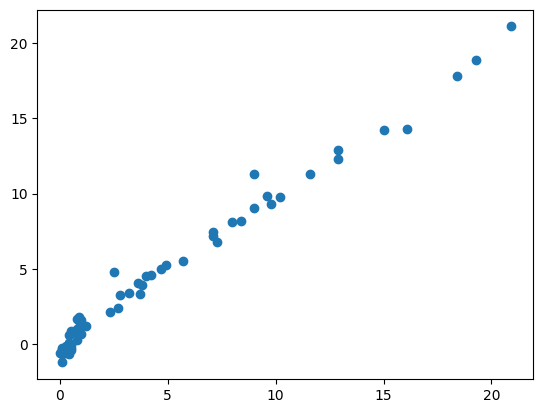

In [36]:
y_pred = cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)

## Ridge Regression Model

Mean Absolute Error:  0.5500259709874813
R2 score:  0.9822511075261627


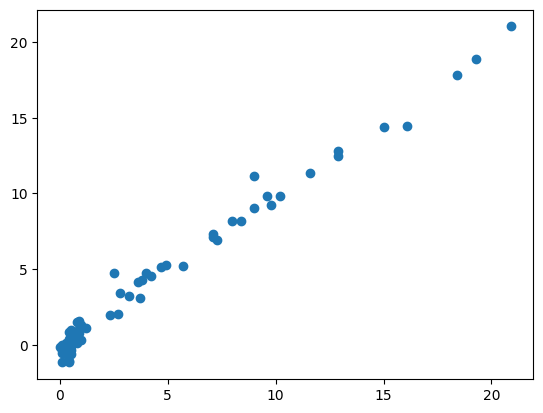

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error:  0.5500259709874813
R2 score:  0.9822511075261627


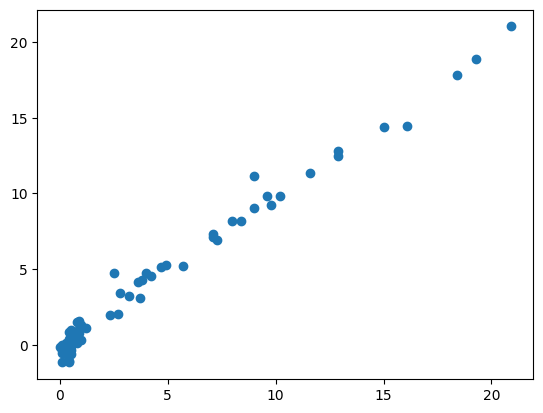

In [37]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(cv=5)
rcv.fit(x_train_scaled,y_train)
y_pred = rcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)

In [40]:
rcv.alphas

(0.1, 1.0, 10.0)

In [42]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNet Regression

Mean Absolute Error:  1.4162570744672374
R2 score:  0.8988470860724427


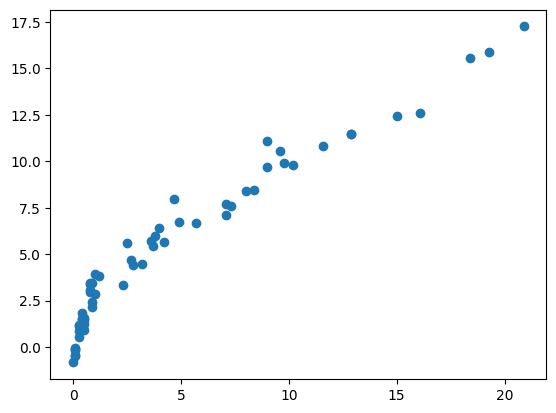

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

Mean Absolute Error:  0.5695000004804175
R2 score:  0.9817541322032908


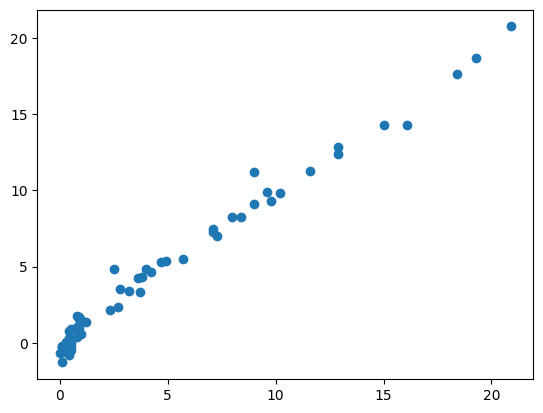

In [43]:
from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV(cv=5)
encv.fit(x_train_scaled,y_train)
y_pred = encv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)

In [44]:
encv.alphas_

array([14.22626564, 13.26746295, 12.37328035, 11.53936267, 10.76164825,
       10.03634917,  9.35993283,  8.72910468,  8.14079224,  7.59213009,
        7.08044593,  6.60324757,  6.15821079,  5.74316799,  5.35609769,
        4.99511463,  4.65846062,  4.34449597,  4.05169148,  3.77862104,
        3.52395463,  3.28645188,  3.06495602,  2.85838824,  2.66574244,
        2.48608032,  2.31852683,  2.16226588,  2.0165364 ,  1.88062859,
        1.75388052,  1.63567484,  1.52543583,  1.42262656,  1.3267463 ,
        1.23732804,  1.15393627,  1.07616482,  1.00363492,  0.93599328,
        0.87291047,  0.81407922,  0.75921301,  0.70804459,  0.66032476,
        0.61582108,  0.5743168 ,  0.53560977,  0.49951146,  0.46584606,
        0.4344496 ,  0.40516915,  0.3778621 ,  0.35239546,  0.32864519,
        0.3064956 ,  0.28583882,  0.26657424,  0.24860803,  0.23185268,
        0.21622659,  0.20165364,  0.18806286,  0.17538805,  0.16356748,
        0.15254358,  0.14226266,  0.13267463,  0.1237328 ,  0.11